In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import random
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.iloc[0].shape

(784,)

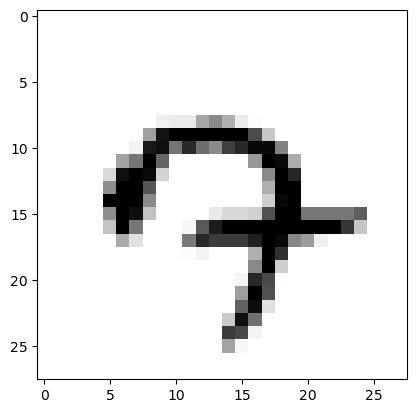

7


In [10]:
random_num = random.randint(0,X.shape[0])
some_digit = np.array(X.iloc[random_num])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("on")
plt.show()
print(y[random_num])

In [15]:
#### TRAIN TEST SPLIT
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
#### BINARY CLASSIFIER
# Creating a Binary Classification Model to identify if the Number in MNIST is 7 or not

y_train_7 = (y_train==7)
y_test_7 = (y_test==7)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

/home/vishu/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [23]:
#### PERFORMANCE MEASURES
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_clf = clone(sgd_clf)

    print(len(train_index), len(test_index))
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_7[train_index]
     
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_7[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

40000 20000
0.98105
40000 20000
0.9735
40000 20000
0.95335


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98105, 0.9735 , 0.95335])

In [21]:
train_index

array([    0,     1,     2, ..., 40436, 40442, 40451])